In [1]:
#conda activate test -- READ THIS
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
data_dir = './64'
image_size = (224, 224)
batch_size = 64
num_classes = 10  # Change this to match your number of LEGO classes

In [3]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.3  # 70% for training, 30% for validation and test
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

Found 28000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.


In [4]:
base_model = VGG19(weights='imagenet', include_top=False)

In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # You can adjust the number of epochs
)

Epoch 1/10
  5/875 [..............................] - ETA: 55:31 - loss: 2.4244 - accuracy: 0.1688

KeyboardInterrupt: 

In [16]:
model.save("lego_classification_model.h5")

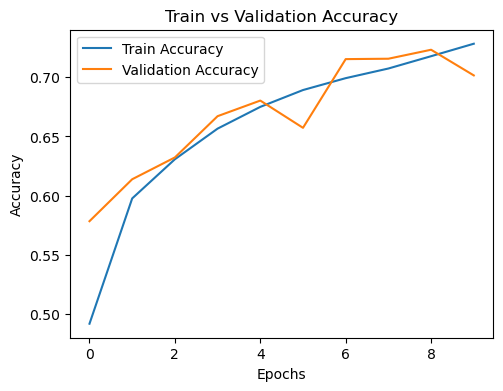

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

In [18]:
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Found 12000 images belonging to 10 classes.
375/375 [==============================] - 1936s 5s/step - loss: 0.8459 - accuracy: 0.7015
Test Loss: 0.8458656668663025, Test Accuracy: 0.7014999985694885


In [6]:
from tensorflow.keras.models import load_model

model = load_model('lego_classification_model.h5')
batch_size = 1
# Assuming you have initialized your validation generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

# Generate one sample from the validation set
sample_images, sample_labels = next(validation_generator)

# Evaluate the sample using the loaded model
loss = model.evaluate(sample_images, sample_labels)

print(f"Loss: {loss}")

Found 12000 images belonging to 10 classes.
1/1 [==============================] - 0s 428ms/step - loss: 0.5231 - accuracy: 1.0000
Loss: [0.5231055617332458, 1.0]


In [51]:
losses = []
data_dir = './64'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.0  # 70% for training, 30% for validation and test
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False,
)

curr_class = []

num_batches = len(train_generator)
print(num_batches)
for i in range(10): #4000 total images for each class
    temp_class = []
    temp_loss = []
    for j in range(4000):
        batch_images, batch_labels = train_generator[i*4000 + j]
        batch_loss = model.evaluate(batch_images, batch_labels)
        temp_loss.extend(batch_loss)
        temp_class.extend(batch_images)
    losses.extend(temp_loss)
    curr_class.extend(temp_class)

# `losses` will contain the evaluated loss for each image in the training dataset
print("Number of evaluated losses:", len(losses))

Found 40000 images belonging to 10 classes.
40000
1/1 [==============================] - 0s 198ms/step - loss: 0.0158 - accuracy: 1.0000
Number of evaluated losses: 80000


In [54]:
print(losses)
temp2 = losses[::2]
print(len(temp2))
print(len(curr_class))

[0.4907124638557434, 1.0, 0.03832460194826126, 1.0, 1.530862808227539, 0.0, 0.9905818700790405, 0.0, 1.1458914279937744, 1.0, 1.1273527145385742, 0.0, 0.7377185225486755, 1.0, 2.9101269245147705, 0.0, 0.7651296257972717, 1.0, 0.005276918411254883, 1.0, 0.8770303726196289, 1.0, 1.595780611038208, 0.0, 0.4054839313030243, 1.0, 0.16422246396541595, 1.0, 0.038226161152124405, 1.0, 2.348345994949341, 0.0, 1.5981422662734985, 0.0, 1.345890998840332, 1.0, 1.2791074514389038, 0.0, 1.4204143285751343, 0.0, 0.8150189518928528, 1.0, 0.0008750900160521269, 1.0, 1.0308010578155518, 1.0, 0.6023938059806824, 1.0, 0.04350177198648453, 1.0, 1.3675605058670044, 0.0, 0.03353015333414078, 1.0, 0.834244966506958, 0.0, 0.18141081929206848, 1.0, 0.005900938995182514, 1.0, 1.6019843816757202, 0.0, 0.6127151846885681, 1.0, 0.5234177708625793, 1.0, 0.030920537188649178, 1.0, 0.7014052867889404, 1.0, 6.108482360839844, 0.0, 0.024418894201517105, 1.0, 4.8323974609375, 0.0, 0.07900872081518173, 1.0, 1.669273376464

Found 40000 images belonging to 10 classes.


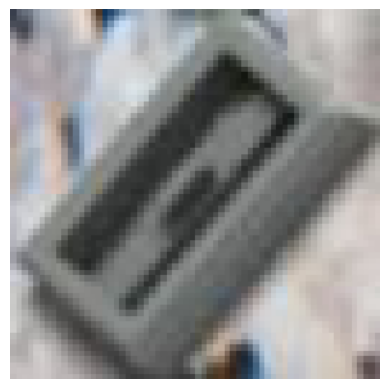

In [22]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.0  # for all images
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False,
)

batch_images, batch_labels = train_generator[4000]

image_to_plot = batch_images[0]  # Change the index to visualize a different image

# Display the image
plt.imshow(image_to_plot)
plt.axis('off')  # Turn off axis labels
plt.show()

In [124]:
num_parts = 10
part_size = len(temp2) // num_parts
loss_parts = [temp2[i * part_size:(i + 1) * part_size] for i in range(num_parts)]
image_parts = [curr_class[i * part_size:(i + 1) * part_size] for i in range(num_parts)]
print(len(loss_parts))

image_indices = np.arange(len(loss_parts[0]))

# Sort the indices based on the associated losses
sorted_indices = sorted(image_indices, key=lambda x: loss_parts[9][x]) # adjust the #'s in this file to the appropriate class
print(sorted_indices)

loss_image_pairs = list(zip(loss_parts[9], image_parts[9])) # this line as well
sorted_loss_image_pairs = sorted(loss_image_pairs, key=lambda x: x[0])

sorted_losses = [pair[0] for pair in sorted_loss_image_pairs]
sorted_images = [pair[1] for pair in sorted_loss_image_pairs]

print(sorted_losses)


10
[1061, 1866, 2968, 501, 2864, 661, 1039, 1059, 1976, 2746, 3321, 160, 2612, 1700, 1659, 2342, 2681, 1385, 812, 813, 286, 1376, 1849, 764, 586, 2006, 756, 3705, 3473, 3063, 2157, 3496, 1783, 233, 1997, 767, 2804, 2683, 3262, 1348, 3666, 3711, 104, 240, 3497, 2222, 946, 3512, 2731, 592, 1219, 1197, 2057, 3191, 8, 2809, 2467, 127, 2970, 1186, 3773, 2641, 3451, 1423, 3599, 1592, 56, 2477, 1778, 558, 3240, 2443, 1550, 2005, 2040, 2652, 3841, 1076, 1523, 3566, 2700, 3260, 1801, 2137, 1401, 962, 941, 1409, 663, 1187, 20, 2082, 2808, 3075, 2783, 1138, 2608, 3082, 139, 1053, 187, 835, 2343, 1210, 1359, 2850, 3800, 3167, 2364, 848, 2316, 3870, 3782, 2599, 2144, 2533, 3493, 2147, 2480, 105, 2312, 2044, 2172, 1510, 1434, 192, 961, 2034, 933, 690, 1431, 401, 3310, 1563, 1922, 3927, 2277, 3498, 2937, 2158, 2514, 3543, 3178, 2754, 2019, 3484, 1442, 273, 1960, 2579, 368, 2702, 768, 1951, 1198, 3444, 676, 3755, 3591, 2381, 1780, 2182, 722, 3002, 3323, 1605, 3727, 1906, 2874, 2143, 3432, 652, 447, 39

In [106]:
num_groups = 4

group_size = len(sorted_images) // num_groups
image_groups = [sorted_images[i * group_size:(i + 1) * group_size] for i in range(num_groups)]
loss_groups = [sorted_losses[i * group_size:(i + 1) * group_size] for i in range(num_groups)]

print(len(image_groups))

4


For the next 2 cells, you have to manually adjust which folder of lego you want to sort into which difficulty.
I.e. "image_path = f"{difficulty_level}/2450/{j}.jpg"  # Adjust filename as needed" and "directory = '2450'" needs to have "2450" changed to the respective lego class. Depending on how many classes you have, you will have to run these cells that many times, you can also automate this process, but it wasn't necessary for us because of the limited number of classes.

In [98]:
from tensorflow.keras.preprocessing.image import save_img

#sort the images into their respective folders, repeat 10 times

folders = ['easy', 'medium', 'hard', 'vhard']

for i, images in enumerate(image_groups):
    difficulty_level = folders[i]
    for j, image in enumerate(images):
        image_path = f"{difficulty_level}/2450/{j}.jpg"  # Adjust filename as needed
        save_img(image_path, image)

In [125]:
from tensorflow.keras.preprocessing.image import save_img

num_groups = 4

group_size = len(sorted_images) // num_groups
image_groups = [sorted_images[i * group_size:(i + 1) * group_size] for i in range(num_groups)]
loss_groups = [sorted_losses[i * group_size:(i + 1) * group_size] for i in range(num_groups)]

print(len(image_groups))

#sort the images into their respective folders, repeat 10 times

folders = 2
directory = '2450'

for i, images in enumerate(image_groups):
    if i < folders:
        for j, image in enumerate(images):
            image_path = f"medium_plus/{directory}/{i*1000 + j}.jpg"  # Adjust filename as needed
            save_img(image_path, image)

folders = 3

for i, images in enumerate(image_groups):
    if i < folders:
        for j, image in enumerate(images):
            image_path = f"hard_plus/{directory}/{i*1000 + j}.jpg"  # Adjust filename as needed
            save_img(image_path, image)

folders = 4

for i, images in enumerate(image_groups):
    if i < folders:
        for j, image in enumerate(images):
            image_path = f"vhard_plus/{directory}/{i*1000 + j}.jpg"  # Adjust filename as needed
            save_img(image_path, image)


4


Found 7000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.
Epoch 1/5
109/109 [==============================] - 1174s 11s/step - loss: 1.4746 - accuracy: 0.5578 - val_loss: 0.6806 - val_accuracy: 0.8811
Epoch 2/5
109/109 [==============================] - 1101s 10s/step - loss: 0.7330 - accuracy: 0.8144 - val_loss: 0.3744 - val_accuracy: 0.9310
Epoch 3/5
109/109 [==============================] - 1036s 10s/step - loss: 0.4727 - accuracy: 0.8834 - val_loss: 0.2399 - val_accuracy: 0.9538
Epoch 4/5
109/109 [==============================] - 1030s 9s/step - loss: 0.3618 - accuracy: 0.9059 - val_loss: 0.1739 - val_accuracy: 0.9626
Epoch 5/5
109/109 [==============================] - 1026s 9s/step - loss: 0.2711 - accuracy: 0.9298 - val_loss: 0.1121 - val_accuracy: 0.9800


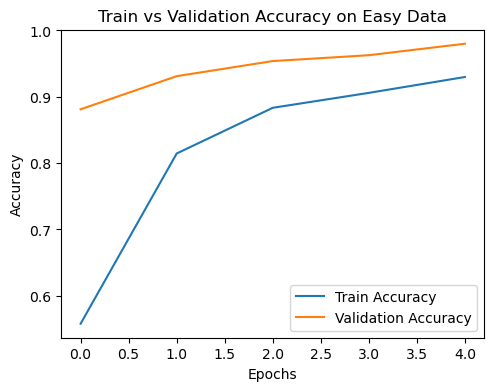

In [2]:
data_dir = './easy'
image_size = (224, 224)
batch_size = 64
num_classes = 10  # Change this to match your number of LEGO classes

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.3  # 70% for training, 30% for validation and test
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

base_model_new = VGG19(weights='imagenet', include_top=False)

x = base_model_new.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_new = Model(inputs=base_model_new.input, outputs=predictions)

for layer in base_model_new.layers:
    layer.trainable = False

# Compile the model
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_new.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5  # You can adjust the number of epochs
)

model_new.save("lego_classification_model_easy.h5") #change this name

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy on Easy Data')
plt.legend()

Found 14000 images belonging to 10 classes.
Found 6000 images belonging to 10 classes.
Epoch 1/5
218/218 [==============================] - 2043s 9s/step - loss: 0.4358 - accuracy: 0.8597 - val_loss: 0.4155 - val_accuracy: 0.8750
Epoch 2/5
218/218 [==============================] - 2045s 9s/step - loss: 0.3387 - accuracy: 0.8904 - val_loss: 0.3665 - val_accuracy: 0.8824
Epoch 3/5
218/218 [==============================] - 2047s 9s/step - loss: 0.2945 - accuracy: 0.9028 - val_loss: 0.3667 - val_accuracy: 0.8795
Epoch 4/5
218/218 [==============================] - 2048s 9s/step - loss: 0.2765 - accuracy: 0.9058 - val_loss: 0.2934 - val_accuracy: 0.9121
Epoch 5/5
218/218 [==============================] - 2065s 9s/step - loss: 0.2303 - accuracy: 0.9242 - val_loss: 0.2734 - val_accuracy: 0.9098


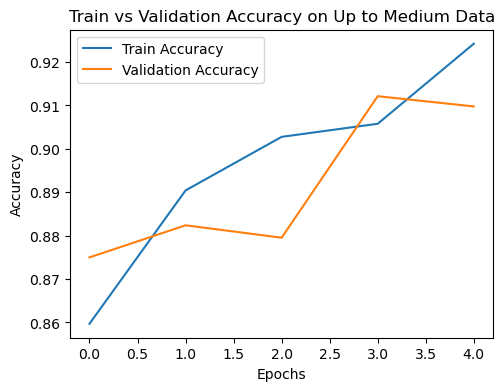

In [3]:
data_dir = './medium_plus'
image_size = (224, 224)
batch_size = 64
num_classes = 10  # Change this to match your number of LEGO classes

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.3  # 70% for training, 30% for validation and test
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

history = model_new.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5  # You can adjust the number of epochs
)

model_new.save("lego_classification_model_medium.h5") #change this name

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy on Up to Medium Data')
plt.legend()

Found 21000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Epoch 1/5
328/328 [==============================] - 3115s 10s/step - loss: 0.6291 - accuracy: 0.7681 - val_loss: 0.3736 - val_accuracy: 0.8867
Epoch 2/5
328/328 [==============================] - 3109s 9s/step - loss: 0.5534 - accuracy: 0.7891 - val_loss: 0.3205 - val_accuracy: 0.8865
Epoch 3/5
328/328 [==============================] - 3109s 9s/step - loss: 0.5082 - accuracy: 0.8051 - val_loss: 0.2826 - val_accuracy: 0.9194
Epoch 4/5
328/328 [==============================] - 3118s 10s/step - loss: 0.4754 - accuracy: 0.8168 - val_loss: 0.2743 - val_accuracy: 0.9129
Epoch 5/5
328/328 [==============================] - 3144s 10s/step - loss: 0.4374 - accuracy: 0.8291 - val_loss: 0.2713 - val_accuracy: 0.8992


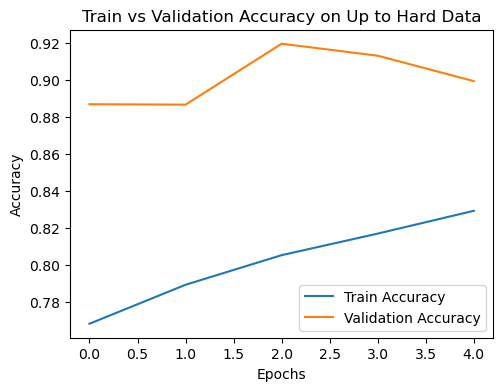

In [4]:
data_dir = './hard_plus'
image_size = (224, 224)
batch_size = 64
num_classes = 10  # Change this to match your number of LEGO classes

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.3  # 70% for training, 30% for validation and test
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

history = model_new.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5  # You can adjust the number of epochs
)

model_new.save("lego_classification_model_hard.h5") #change this name

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy on Up to Hard Data')
plt.legend()

Found 28000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.
Epoch 1/5
437/437 [==============================] - 4243s 10s/step - loss: 1.1058 - accuracy: 0.6147 - val_loss: 0.4891 - val_accuracy: 0.8758
Epoch 2/5
437/437 [==============================] - 4227s 10s/step - loss: 1.0389 - accuracy: 0.6299 - val_loss: 0.4481 - val_accuracy: 0.8626
Epoch 3/5
437/437 [==============================] - 4207s 10s/step - loss: 1.0100 - accuracy: 0.6396 - val_loss: 0.4678 - val_accuracy: 0.8882
Epoch 4/5
437/437 [==============================] - 4299s 10s/step - loss: 0.9782 - accuracy: 0.6481 - val_loss: 0.4382 - val_accuracy: 0.8742
Epoch 5/5
437/437 [==============================] - 4178s 10s/step - loss: 0.9550 - accuracy: 0.6581 - val_loss: 0.4109 - val_accuracy: 0.8913


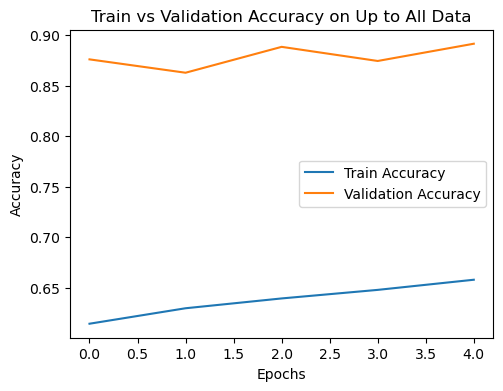

In [5]:
data_dir = './vhard_plus'
image_size = (224, 224)
batch_size = 64
num_classes = 10  # Change this to match your number of LEGO classes

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.3  # 70% for training, 30% for validation and test
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

history = model_new.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5  # You can adjust the number of epochs
)

model_new.save("lego_classification_model_vhard.h5") #change this name

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy on Up to All Data')
plt.legend()

In [12]:
data_dir = './vhard_plus'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.3  # 70% for training, 30% for validation and test
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

evaluation = model_new.evaluate(test_generator)

print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

Found 12000 images belonging to 10 classes.
188/188 [==============================] - 1300s 7s/step - loss: 0.4110 - accuracy: 0.8912
Test Loss: 0.41101518273353577
Test Accuracy: 0.8911666870117188


In [10]:
loaded_model = tf.keras.models.load_model('./lego_classification_model.h5')

data_dir = './64'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.3  # 70% for training, 30% for validation and test
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

evaluation = loaded_model.evaluate(test_generator)

print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

Found 12000 images belonging to 10 classes.
188/188 [==============================] - 1452s 8s/step - loss: 0.8459 - accuracy: 0.7015
Test Loss: 0.8458652496337891
Test Accuracy: 0.7014999985694885
